In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Boston housing dataset for 1970

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()
boston['DESCR'][300:-1090]

"    - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teacher ratio by town\n        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n        - LSTAT    % lower status of the population\n        - MEDV     Median value of owner-occupied homes in $1000's\n\n    :Missing Attribute "

Getting Features and label

In [39]:
boston_features=pd.DataFrame(boston.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

boston_label=pd.Series(boston['target'],name='Average_Price*1000')

Explotary data analyses on features and label

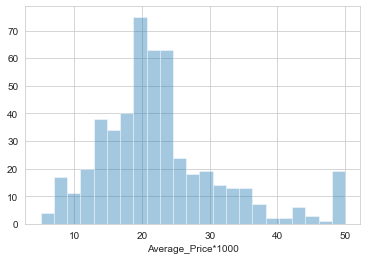

In [43]:
sns.set_style('whitegrid')
sns.distplot(boston_label,kde=False)

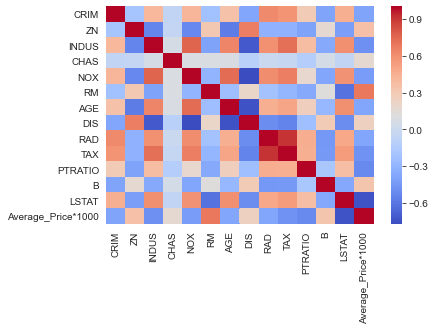

In [50]:
sns.heatmap(pd.concat([boston_features,pd.DataFrame(boston_label)],axis=1).corr(),cmap='coolwarm')

Splitng data into training and testing .33% of datset is considered as testing

In [55]:
features_train,features_test,label_train,label_test=train_test_split(boston_features,boston_label,test_size=0.33,random_state=111)

Building linear model and evaluating its performances

In [56]:
lm=LinearRegression()
lm.fit(X=features_train,y=label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lm.intercept_

34.587002912220086

In [59]:
pd.DataFrame(data=lm.coef_,index=features_train.columns,columns=['Lm Coefficients'])

,Lm Coefficients
CRIM,-0.117117
ZN,0.046773
INDUS,0.041607
CHAS,1.268744
NOX,-14.609559
RM,3.705556
AGE,-0.008175
DIS,-1.322500
RAD,0.257930
TAX,-0.010958


In [60]:
predict_label=lm.predict(features_test)

plotting perdicted and actual label (price*1000) value

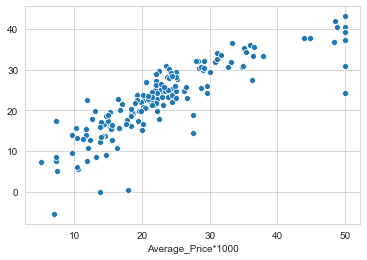

In [61]:
sns.scatterplot(x=label_test,y=predict_label)

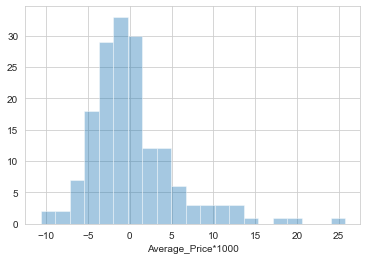

In [63]:
sns.distplot(label_test-predict_label,kde=False)

Evaluating Performance metrics

In [65]:
metrics.mean_absolute_error(label_test,predict_label)

3.569561975427838

In [66]:
metrics.mean_squared_error(label_test,predict_label)

26.928688970293653

In [68]:
RMSError=np.sqrt(metrics.mean_squared_error(label_test,predict_label))
RMSError

5.189285978850429

In [69]:
boston_label.mean()

22.532806324110698

After evaluating the model and its performance metrics the built linear model has good performance(RMSE around 5)